Modelltraining für non-vpn2016 Dataset

Git wird gecloned

In [ ]:
!git clone https://github.com/Becker99/Computer-Networks.git


In [ ]:
%cd Computer-Networks

In [ ]:
!pip install -r requirements.txt

All the requirements and dependencies will be installed

In [ ]:
import zipfile
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import LabelEncoder



Here we extract the training_set.zip because I couldn't upload the extracted file on GitHub

In [ ]:
# Path to the Zip file
zip_path = 'data/training_set/training_set.zip'

# Target directory for the extracted set
extract_path = 'data/training_set/'

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Load data from JSON files
data = []
with open('/content/Computer-Networks/data/training_set/training_set.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
training_set = pd.json_normalize(data)

# Load annotation files
with open('/content/Computer-Networks/data/training_annotations/2_training_anno_top.json', 'r') as f:
    annotations_data_top = json.load(f)
# Check the structure of the annotation data
print("Beispiel eines Eintrags in Top-Level Annotations:", list(annotations_data_top.items())[0])
# Extract unique IDs for Top-Level
ids_fine = set(str(entry[0]) for entry in annotations_data_top.items())

with open('/content/Computer-Networks/data/training_annotations/2_training_anno_mid.json', 'r') as f:
    annotations_data_mid = json.load(f)
# Check the structure of the annotation data
print("Beispiel eines Eintrags in Mid-Level Annotations:", list(annotations_data_mid.items())[0])
# Extract unique IDs for Mid-Level
ids_mid = set(str(entry[0]) for entry in annotations_data_mid.items())

with open('/content/Computer-Networks/data/training_annotations/2_training_anno_fine.json', 'r') as f:
    annotations_data_fine = json.load(f)
# Check the structure of the annotation data
print("Beispiel eines Eintrags in Fine-Grained Annotations:", list(annotations_data_fine.items())[0])
# Extract unique IDs for Fine-Grained
ids_fine = set(str(entry[0]) for entry in annotations_data_fine.items())



Beispiel eines Eintrags in Top-Level Annotations: ('3145728', 'audio')
Beispiel eines Eintrags in Mid-Level Annotations: ('3145728', 'skype')
Beispiel eines Eintrags in Fine-Grained Annotations: ('3145728', 'skype_audio')


In [ ]:
# Extract labels from the annotation files
labels_from_annotations_top = [annotations_data_top.get(str(entry['id']), 'unknown_label') for _, entry in training_set.iterrows()]
labels_from_annotations_mid = [annotations_data_mid.get(str(entry['id']), 'unknown_label') for _, entry in training_set.iterrows()]
labels_from_annotations_fine = [annotations_data_fine.get(str(entry['id']), 'unknown_label') for _, entry in training_set.iterrows()]

# Add labels to the training set
training_set['label_top'] = labels_from_annotations_top
training_set['label_mid'] = labels_from_annotations_mid
training_set['label_fine'] = labels_from_annotations_fine

# Remove columns containing lists
training_set = training_set.applymap(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Extract numerical features
numeric_columns = training_set.select_dtypes(include=['number']).columns
X = training_set[numeric_columns]


In [ ]:
# For Top Level
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, training_set['label_top'], test_size=0.2, random_state=42, stratify=training_set['label_top'])

# Preprocessing: Standardize the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the data
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Check if there are still NaN values
print(np.isnan(X_train_scaled_imputed).sum())

# Apply the same imputer to the validation data
X_val_scaled_imputed = imputer.transform(X_val_scaled)


0


In [ ]:
# For Mid-Level
# Split data into training and validation sets
X_train_mid, X_val_mid, y_train_mid, y_val_mid = train_test_split(X, training_set['label_mid'], test_size=0.2, random_state=42, stratify=training_set['label_mid'])

# Preprocessing: Standardize the data
scaler_mid = preprocessing.StandardScaler()
X_train_scaled_mid = scaler_mid.fit_transform(X_train_mid)
X_val_scaled_mid = scaler_mid.transform(X_val_mid)

# Create an imputer
imputer_mid = SimpleImputer(strategy='mean')

# Apply the imputer to the data
X_train_scaled_imputed_mid = imputer_mid.fit_transform(X_train_scaled_mid)

# Check if there are still NaN values
print(np.isnan(X_train_scaled_imputed_mid).sum())

# Apply the same imputer to the validation data
X_val_scaled_imputed_mid = imputer_mid.transform(X_val_scaled_mid)


0


In [ ]:
#Für Fine-Grained
# Split data into training and validation sets
X_train_fine, X_val_fine, y_train_fine, y_val_fine = train_test_split(X, training_set['label_fine'], test_size=0.2, random_state=42, stratify=training_set['label_fine'])

# Preprocessing: Standardize the data
scaler_fine = preprocessing.StandardScaler()
X_train_scaled_fine = scaler_fine.fit_transform(X_train_fine)
X_val_scaled_fine = scaler_fine.transform(X_val_fine)

# Create an imputer
imputer_fine = SimpleImputer(strategy='mean')

# Apply the imputer to the data
X_train_scaled_imputed_fine = imputer_fine.fit_transform(X_train_scaled_fine)

# Check if there are still NaN values
print(np.isnan(X_train_scaled_imputed_fine).sum())

# Apply the same imputer to the validation data
X_val_scaled_imputed_fine = imputer_fine.transform(X_val_scaled_fine)


0


n_estimators: The number of trees in the forest. We selected 100, which is a sufficient number to achieve good performance without consuming too many resources.

max_depth: The maximum depth of each decision tree. We chose 10 to avoid overfitting and ensure that the trees do not become too complex.

random_state: This parameter ensures reproducibility of results. The same random_state always leads to the same random decisions during training.

n_jobs: This parameter allows parallelization of the training process by utilizing multiple processor cores. A value of -1 means that all available cores should be used.

max_features: This parameter specifies how many features each decision tree should consider when searching for the best split. "sqrt" means the square root of the number of features, a common practice to ensure satisfactory variance.

We chose these specific parameters based on a combination of best practices and experimental testing. The mentioned values are common starting points and can be adjusted depending on the dataset and specific use case. The focus is on creating a balanced model with good generalization properties that is not overly fitted to the training data.

The trained models are stored in clf_top, clf_mid, clf_fine. To save the weights we would use joblib.

In [ ]:
# Create and train the model for Top-Level
clf_top = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1, max_features="sqrt")
clf_top.fit(X_train_scaled_imputed, y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Create and train the model for Mid-Level
clf_mid = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1, max_features="sqrt")
clf_mid.fit(X_train_scaled_imputed_mid, y_train_mid)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Create and train the model for Fine-Grained
clf_fine = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1, max_features="sqrt")
clf_fine.fit(X_train_scaled_imputed_fine, y_train_fine)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions for Top-Level, Mid-Level, and Fine-Grained models
ypred_top = clf_top.predict(X_val_scaled_imputed)
ypred_mid = clf_mid.predict(X_val_scaled_imputed_mid)
ypred_fine = clf_fine.predict(X_val_scaled_imputed_fine)

# Calculate and display accuracies for Top-Level, Mid-Level, and Fine-Grained models
accuracy_top = accuracy_score(y_val, ypred_top)
accuracy_top = accuracy_score(y_val, ypred_top)
accuracy_mid = accuracy_score(y_val_mid, ypred_mid)
accuracy_fine = accuracy_score(y_val_fine, ypred_fine)

print(f'Genauigkeit Top-Level: {accuracy_top * 100:.2f}%')
print(f'Genauigkeit Mid-Level: {accuracy_mid * 100:.2f}%')
print(f'Genauigkeit Fine-Grained: {accuracy_fine * 100:.2f}%')


Genauigkeit Top-Level: 72.27%
Genauigkeit Mid-Level: 45.46%
Genauigkeit Fine-Grained: 34.69%


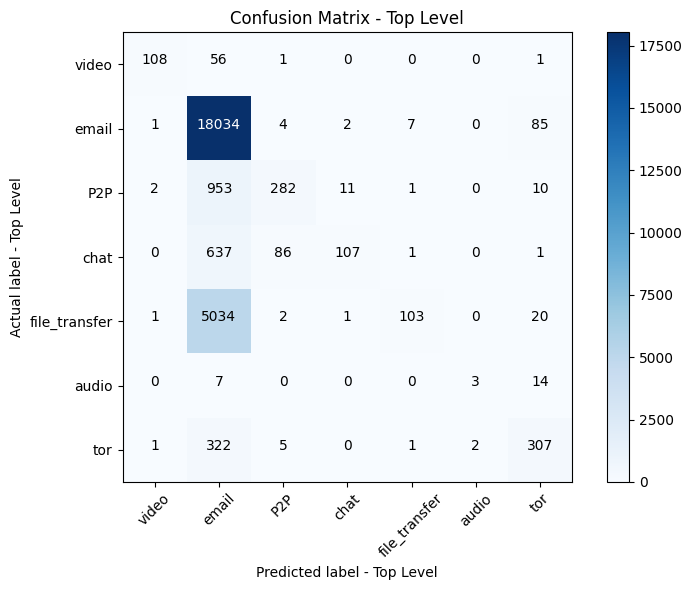

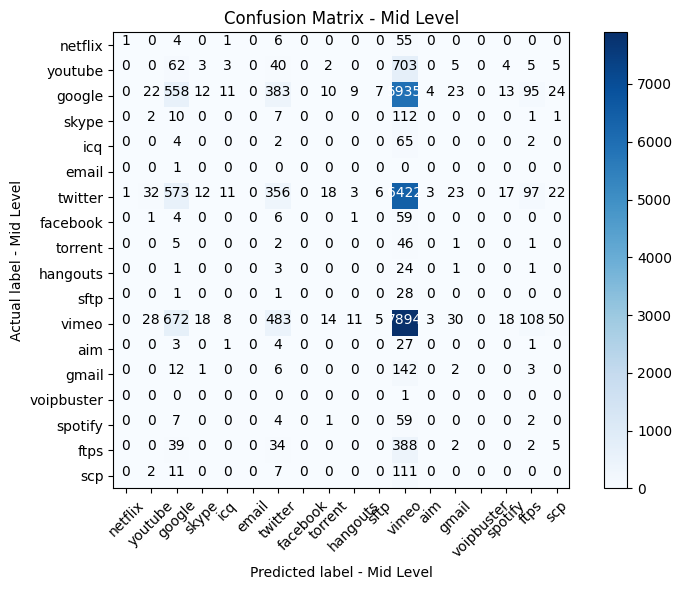

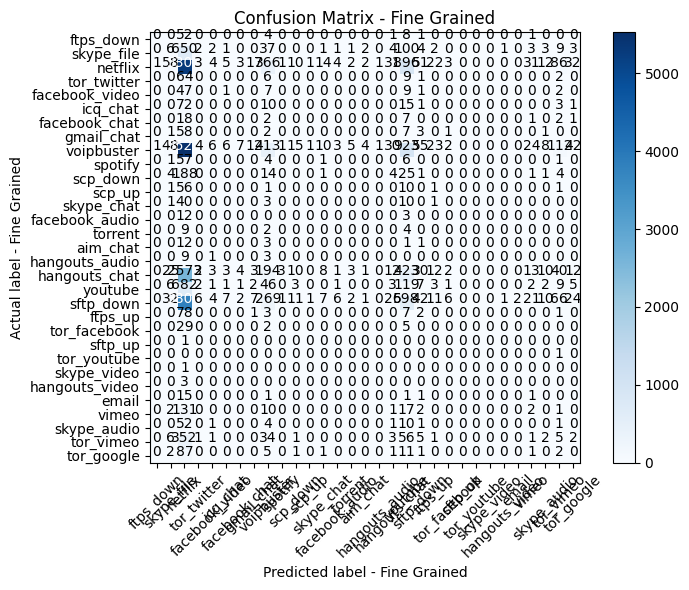

In [ ]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, hierarchy_level, annotation_data, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    Plot the confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: List of classes
    - hierarchy_level: Hierarchy level (Top Level, Mid Level, Fine Grained)
    - annotation_data: Annotation data
    - normalize: Whether to normalize the values
    - title: Plot title
    - cmap: Color map
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel(f'Actual label - {hierarchy_level}')
    plt.xlabel(f'Predicted label - {hierarchy_level}')
    plt.tight_layout()


# Top-Level
class_names_top = list(set(annotations_data_top.values()))

ypred_top = clf_top.predict(X_val_scaled_imputed)
plot_confusion_matrix(y_val, ypred_top, class_names_top, hierarchy_level='Top Level', annotation_data=annotations_data_top, title='Confusion Matrix - Top Level')
plt.show()

# Mid-Level
class_names_mid = list(set(annotations_data_mid.values()))

ypred_mid = clf_mid.predict(X_val_scaled_imputed)
plot_confusion_matrix(y_val_mid, ypred_mid, class_names_mid, hierarchy_level='Mid Level', annotation_data=annotations_data_mid, title='Confusion Matrix - Mid Level')
plt.show()

# Fine-Grained
class_names_fine = list(set(annotations_data_fine.values()))

ypred_fine = clf_fine.predict(X_val_scaled_imputed)
plot_confusion_matrix(y_val_fine, ypred_fine, class_names_fine, hierarchy_level='Fine Grained', annotation_data=annotations_data_fine, title='Confusion Matrix - Fine Grained')
plt.show()



In [ ]:
# Load the test dataset
test_data_path = 'data/test_set/1_test-std_set.json'
test_data = []

with open(test_data_path, 'r') as f:
    for line in f:
        test_data.append(json.loads(line))

# Normalize the test dataset (perform the same steps as for the training data)
test_set = pd.json_normalize(test_data)
test_set = test_set.applymap(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Ensure that the order of features in the test data matches the order in the training data
X_test = test_set[numeric_columns]

# Preprocessing: Standardize the test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled_imputed_mid = imputer_mid.transform(X_test_scaled)

# Make predictions for Top-Level
ypred_test_top = clf_top.predict(X_test_scaled_imputed)

# Make predictions for Mid-Level
ypred_test_mid = clf_mid.predict(X_test_scaled_imputed_mid)

# Make predictions for Fine-Grained
X_test_scaled_imputed_fine = imputer_fine.transform(X_test_scaled)  # Corrected line
ypred_test_fine = clf_fine.predict(X_test_scaled_imputed_fine)

# Organize predictions in the required JSON format
predictions = {
    "Top Level": list(ypred_test_top),
    "Mid Level": list(ypred_test_mid),
    "Fine Grained": list(ypred_test_fine)
}

# Save predictions to a file
output_predictions_path = 'data/test_set/predictions.json'
with open(output_predictions_path, 'w') as f:
    json.dump(predictions, f)